In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
#Reading the database
df=pd.read_csv('IPL_matches.csv')

In [3]:
#First few lines of the database
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#checking if there are any null values in the database
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
#dropping the column 'umpire3' as there are many null values
df.drop('umpire3',axis=1,inplace=True)

In [6]:
#dropping all the rows having null values
df.dropna(inplace=True)

In [7]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [8]:
#looking into the list of all unique teams
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [9]:
#delhi daredevils and delhi capitals are the same teams. Hence we replace them. Similarly with Deccan Chargers and Sunrisers Hyderabad
df['team1']=df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team2']=df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df['toss_winner']=df['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')
df['winner']=df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

df['team1']=df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2']=df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['toss_winner']=df['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['winner']=df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

# Visualization

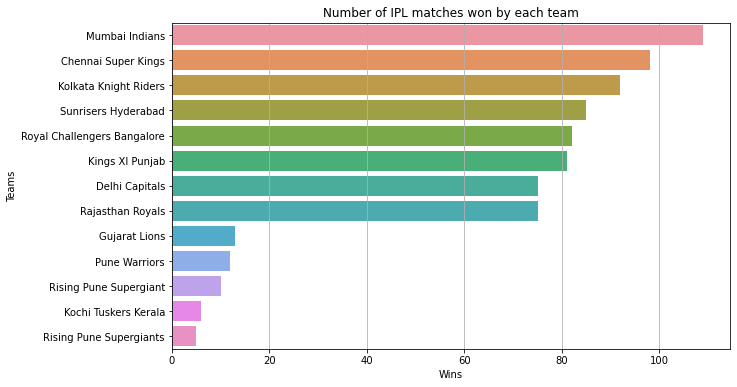

In [10]:
#visualizing the number of matches won by each team
plt.figure(figsize=(10,6))
sns.countplot(y='winner',data=df, order=df['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Teams')
plt.title('Number of IPL matches won by each team')
plt.grid(axis='x')

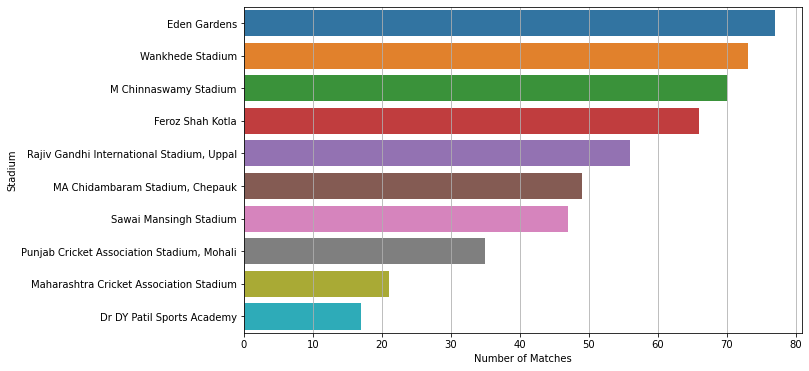

In [11]:
#visualizing the number of matches played in each stadium
plt.figure(figsize=(10,6))
sns.countplot(y='venue',data=df,order=df['venue'].value_counts().iloc[:10].index)
plt.ylabel('Stadium')
plt.xlabel('Number of Matches')
plt.grid(axis='x')

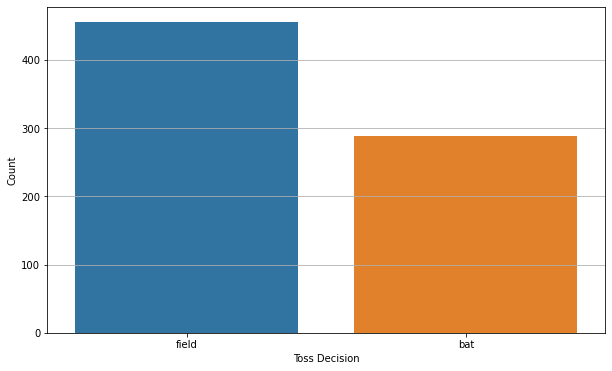

In [12]:
#visualizing the toss decision
plt.figure(figsize=(10,6))
sns.countplot(x='toss_decision',data=df)
plt.ylabel('Count')
plt.xlabel('Toss Decision')
plt.grid(axis='y')

In [13]:
#we can drop some more columns that won't affect our results. hence increasing the model's accuracy
df.drop(['id','Season','city','date','player_of_match','venue','umpire1','umpire2',],axis=1,inplace=True)

In [14]:
df

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9
...,...,...,...,...,...,...,...,...,...
750,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6


In [15]:
#converting data  into dependent and independent
X=df.drop(['winner'],axis=1)
y=df['winner']

In [16]:
#converting the categorical values into numerical values
X=pd.get_dummies(X,['team1','team2','toss_winner','toss_decision','result'],drop_first=True)

In [17]:
#converting output data into numerical using LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [18]:
#test set and train set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

# Model Creation and Evaluation

We use Random Forest Classification, Logistic Regression and Decision Tree Classification

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model=RandomForestClassifier(n_estimators=200,min_samples_split=3,max_features='auto')

In [21]:
#training the Random Forest Classifier Model
model.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [22]:
#predicting the x_test values and storing it as y_pred
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_pred,y_test)

In [24]:
ac

0.905829596412556

# The Accuracy was found to be 90.58%